In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(20,10)

In [2]:
df1=pd.read_csv('Bengaluru_House_Data.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape

(13320, 9)

In [4]:
df1=df1.drop(['area_type','availability','society'],axis=1)
df1.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [5]:
df1.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [6]:
df2=df1.dropna()
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [7]:
df2.shape

(12710, 6)

In [8]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [9]:
df2['BHK']=df2['size'].apply(lambda x: int(x.split(' ')[0]))
df2.head()

<ipython-input-9-a57487b7ca79>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['BHK']=df2['size'].apply(lambda x: int(x.split(' ')[0]))


,location,size,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [10]:
df2.shape

(12710, 7)

In [11]:
df2['BHK'].unique()

array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13],
      dtype=int64)

In [12]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [13]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [14]:
df2[~df2['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,balcony,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,0.0,63.770,2
661,Yelahanka,2 BHK,1120 - 1145,2.0,0.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,0.0,445.000,4
772,Banashankari Stage VI,2 BHK,1160 - 1195,2.0,0.0,59.935,2


In [15]:
def convert_sqrt_to_num(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [16]:
convert_sqrt_to_num('2334')

2334.0

In [17]:
convert_sqrt_to_num('1195-1445')        

1320.0

In [18]:
convert_sqrt_to_num('34.46Sq. Meter')

In [19]:
df3=df2.copy()
df3['total_sqft']=df3['total_sqft'].apply(convert_sqrt_to_num)
df3.head(20)

,location,size,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,2
8,Marathahalli,3 BHK,1310.0,3.0,1.0,63.25,3
10,Whitefield,3 BHK,1800.0,2.0,2.0,70.00,3
11,Whitefield,4 Bedroom,2785.0,5.0,3.0,295.00,4
12,7th Phase JP Nagar,2 BHK,1000.0,2.0,1.0,38.00,2


In [20]:
df4=df3.copy()
df4['price_per_sqrt']=df4['price']*100000/df4['total_sqft']
df4.head()

,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqrt
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [21]:
len(df4.location.unique())

1265

In [22]:
df4['location']=df4['location'].apply(lambda x: x.strip())

location_stats=df4.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield              515
Sarjapur  Road          372
Electronic City         302
Kanakpura Road          261
Thanisandra             234
                       ... 
Kanakapura  Rod           1
Kanakapura Main Road      1
Kanakapura Road           1
Kanakapura Road,          1
whitefiled                1
Name: location, Length: 1254, dtype: int64

In [23]:
len(location_stats[location_stats<10])

1007

In [24]:
location_stats_less_than_10=location_stats[location_stats<10]
location_stats_less_than_10

location
Chandra Layout          9
Nehru Nagar             9
Kamakshipalya           9
B Narayanapura          9
Nagadevanahalli         9
                       ..
Kanakapura  Rod         1
Kanakapura Main Road    1
Kanakapura Road         1
Kanakapura Road,        1
whitefiled              1
Name: location, Length: 1007, dtype: int64

In [25]:
len(df4.location.unique())

1254

In [26]:
df4.location=df4.location.apply(lambda x:'other' if x in location_stats_less_than_10 else x)
len(df4.location.unique())


248

In [27]:
df4.head(20)

,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqrt
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,2,3247.863248
8,Marathahalli,3 BHK,1310.0,3.0,1.0,63.25,3,4828.244275
10,Whitefield,3 BHK,1800.0,2.0,2.0,70.00,3,3888.888889
11,Whitefield,4 Bedroom,2785.0,5.0,3.0,295.00,4,10592.459605
12,7th Phase JP Nagar,2 BHK,1000.0,2.0,1.0,38.00,2,3800.000000


In [28]:
df4[df4.total_sqft/df4.BHK<300].head()

,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqrt
58,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,0.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,2.0,100.0,3,20000.000000
78,Kaval Byrasandra,2 BHK,460.0,1.0,0.0,22.0,2,4782.608696
89,Rajaji Nagar,6 Bedroom,710.0,6.0,3.0,160.0,6,22535.211268


In [29]:
df5=df4[~(df4.total_sqft/df4.BHK<300)]
df5.shape

(12055, 8)

In [30]:
df5.price_per_sqrt.describe()

count     12013.000000
mean       6206.082347
std        3985.518807
min         267.829813
25%        4199.363057
50%        5252.525253
75%        6823.529412
max      176470.588235
Name: price_per_sqrt, dtype: float64

In [31]:
def remove_pps_outliners(df):
    df_out= pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqrt)
        sd=np.std(subdf.price_per_sqrt)
        reduced_df=subdf[(subdf.price_per_sqrt>(m-sd)) & (subdf.price_per_sqrt<=(m+sd))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df6=remove_pps_outliners(df5)
df6.shape

(9829, 8)

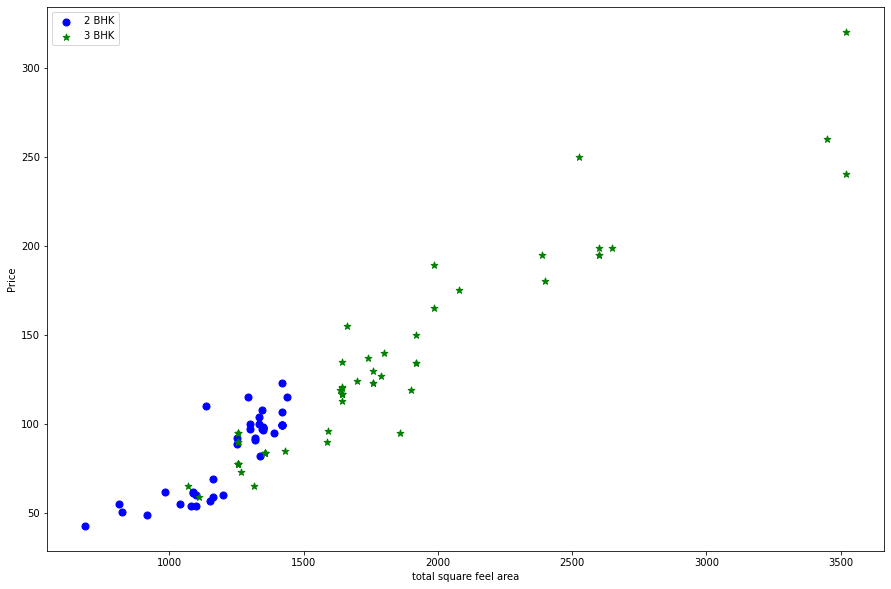

In [32]:
def plot_scatter_chat(df,location):
    bhk2=df[(df.location==location) & (df.BHK==2)]
    bhk3=df[(df.location==location) & (df.BHK==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,color='green',label='3 BHK',marker="*",s=50)
    plt.xlabel("total square feel area")
    plt.ylabel("Price")
    plt.legend()
    
plot_scatter_chat(df6,"Hebbal")   


In [33]:
def remove_bhk_outliers(df):
    exclude_entery=np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in df.groupby('BHK'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sqrt),
                'std':np.std(bhk_df.price_per_sqrt),
                'count':bhk_df.shape[0]
            }
        for bhk,bhk_df in df.groupby('BHK'):  
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_entery=np.append(exclude_entery,bhk_df[bhk_df.price_per_sqrt<(stats['mean'])].index.values)
                
    return df.drop(exclude_entery,axis='index')       
df7=remove_bhk_outliers(df6)
df7.shape

(5106, 8)

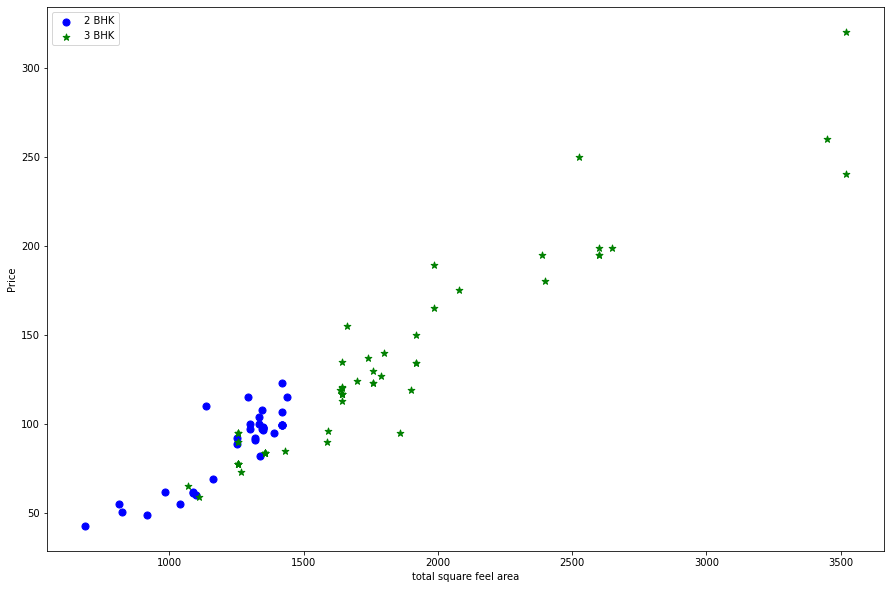

In [34]:
plot_scatter_chat(df7,'Hebbal')

(array([ 113., 1884., 2280.,  443.,  232.,   91.,   40.,   14.,    4.,
           5.]),
 array([ 1300.        ,  3620.98039216,  5941.96078431,  8262.94117647,
        10583.92156863, 12904.90196078, 15225.88235294, 17546.8627451 ,
        19867.84313725, 22188.82352941, 24509.80392157]),
 <BarContainer object of 10 artists>)

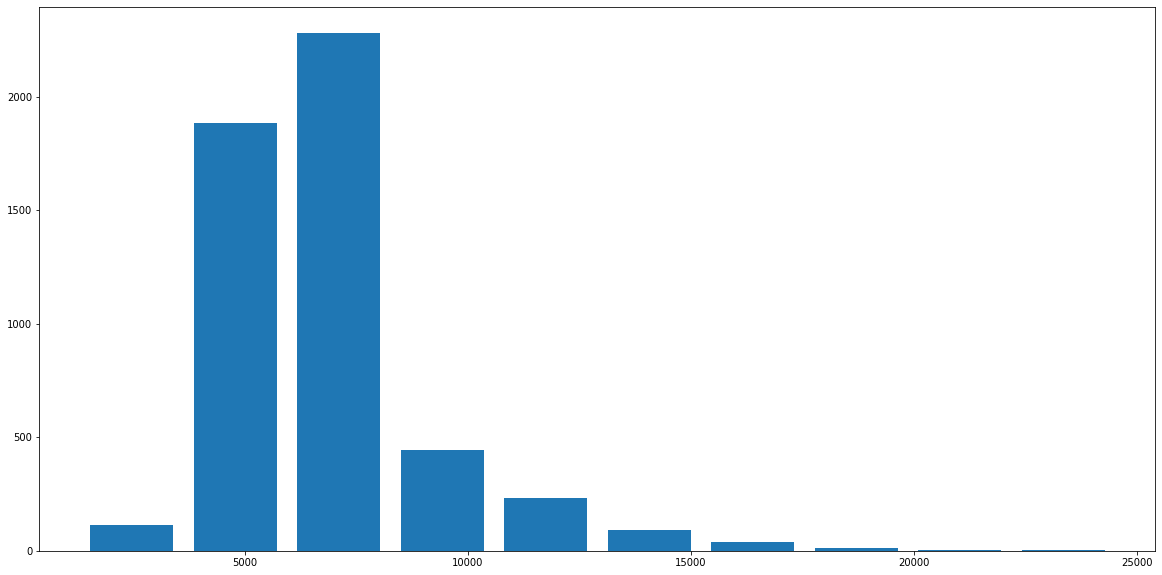

In [35]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
plt.hist(df7.price_per_sqrt,rwidth=0.8)
                    


In [36]:
df7.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 13.])

In [37]:
df7[df7.bath>7]

,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqrt
38,2nd Stage Nagarbhavi,6 Bedroom,3000.0,8.0,3.0,451.0,6,15033.333333
39,2nd Stage Nagarbhavi,6 Bedroom,2400.0,8.0,3.0,450.0,6,18750.000000
3387,Indira Nagar,8 Bedroom,3250.0,8.0,1.0,600.0,8,18461.538462
5476,Raja Rajeshwari Nagar,9 Bedroom,3600.0,9.0,3.0,240.0,9,6666.666667
7753,other,8 Bedroom,2600.0,8.0,2.0,180.0,8,6923.076923
7788,other,11 BHK,5000.0,9.0,3.0,360.0,11,7200.000000
8137,other,6 BHK,11338.0,9.0,1.0,1000.0,6,8819.897689
9267,other,13 BHK,5425.0,13.0,0.0,275.0,13,5069.124424
9512,other,8 BHK,3300.0,8.0,3.0,310.0,8,9393.939394


(array([2.868e+03, 1.619e+03, 4.350e+02, 1.240e+02, 4.800e+01, 8.000e+00,
        3.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 1. ,  2.2,  3.4,  4.6,  5.8,  7. ,  8.2,  9.4, 10.6, 11.8, 13. ]),
 <BarContainer object of 10 artists>)

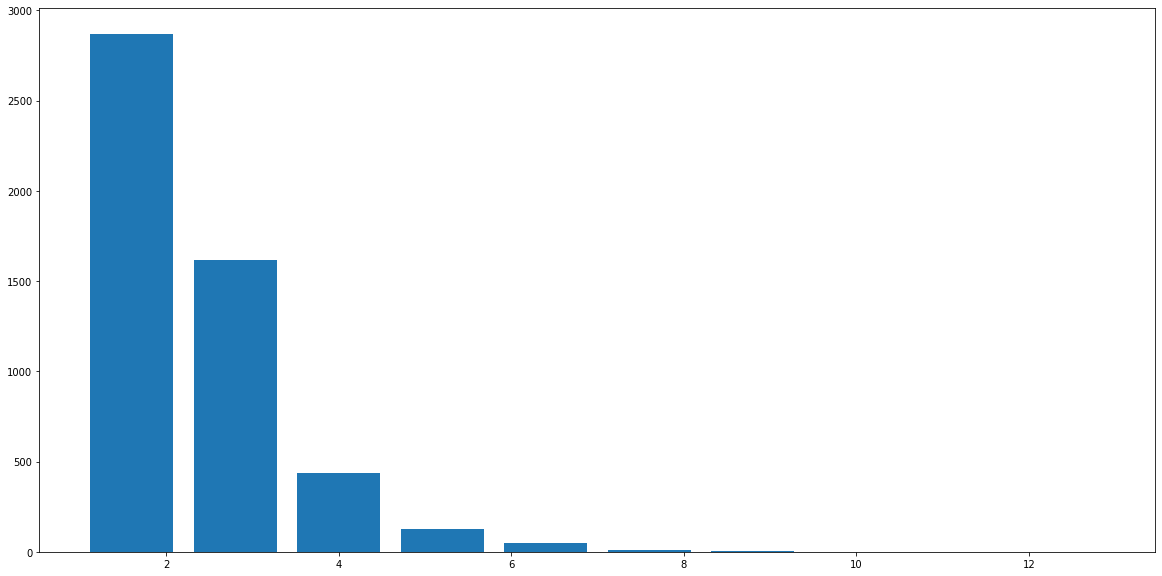

In [38]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
plt.hist(df7.bath,rwidth=0.8)

In [39]:
df7[df7.bath>df7.BHK+2]

,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqrt
6511,Thanisandra,3 BHK,1806.0,6.0,2.0,116.0,3,6423.034330
8137,other,6 BHK,11338.0,9.0,1.0,1000.0,6,8819.897689


In [40]:
df8=df7[df7.bath<df7.BHK+2]
df8.shape

(5046, 8)

In [41]:
df9=df8.drop(['balcony','size','price_per_sqrt'],axis=1)
df9.head()

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [42]:
dummies=pd.get_dummies(df9.location)
dummies.head(3)

,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:

df10=pd.concat([df9,dummies.drop('other',axis=1)],axis=1)
df10.head()

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,...,Varthur,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
df11=df10.drop('location',axis=1)
df11.head(2)    

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,...,Varthur,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
df11.shape

(5046, 226)

In [46]:
X=df11.drop('price',axis=1)
X.head()

,total_sqft,bath,BHK,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Varthur,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
y=df11.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [48]:
X.shape

(5046, 225)

In [49]:
y.shape

(5046,)

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [51]:
from sklearn.linear_model import LinearRegression
ir_clf=LinearRegression()
ir_clf.fit(X_train,y_train)
ir_clf.score(X_test,y_test)

0.8628794356649294

In [52]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

cross_val_score(LinearRegression(),X,y,cv=cv)

array([ 7.86617433e-01,  7.47376024e-01, -1.54337667e+14,  8.53410205e-01,
       -1.51741559e+14])

In [53]:
from  sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_model(X,y):
    model_params = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'normalize':[True,False]
           }
        },  
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
                
         },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse','friedman_mse'],
                'splitter':['best','random']
            }
        }   
             
    }
    
     
    scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name,config in model_params.items():
        gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        scores.append({
            
           'model': algo_name,
           'best_score': gs.best_score_,
           'best_params': gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_model(X,y)

,model,best_score,best_params
0,linear_regression,-6.121585e+13,{'normalize': False}
1,lasso,6.907508e-01,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,7.290953e-01,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [60]:
from sklearn.linear_model import LinearRegression
ir_clf=LinearRegression()
ir_clf.fit(X_train,y_train)
ir_clf.score(X_test,y_test)

0.8628794356649294

In [57]:
X.columns

Index(['total_sqft', 'bath', 'BHK', '1st Block Jayanagar',
       '1st Block Koramangala', '1st Phase JP Nagar', '2nd Stage Nagarbhavi',
       '5th Phase JP Nagar', '6th Phase JP Nagar', '7th Phase JP Nagar',
       ...
       'Varthur', 'Vidyaranyapura', 'Vijayanagar', 'Vishveshwarya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yeshwanthpur'],
      dtype='object', length=225)

In [56]:
def (location,sqft,bath,BHK):
    loc_index=np.where(X.columns==location)[0][0]
    
    x=np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=BHK
    if loc_index >=0:
        x[loc_index]=1
        
    return ir_clf.predict([x])[0]    
    

In [58]:
predict_price('1st Phase JP Nagar',1000,2,2)

86.43356112665457

In [74]:
predict_price('1st Phase JP Nagar',1000,2,3)

88.43250979061288

In [70]:
predict_price('Indira Nagar',1000,2,3)

138.01541451726735

In [69]:
predict_price('Indira Nagar',1000,3,3)

138.71126460276395

In [75]:
import pickle
with open("banglore_home_price_model",'wb') as f:
    pickle.dump(ir_clf,f)

In [76]:
import  json
columns ={
    'data_columns':[col.lower() for col in X.columns]

}
with open("columns.json",'w') as f:
    f.write(json.dumps(columns))